<a href="https://colab.research.google.com/github/Klaudia2022/Obliczenianaukowe/blob/main/uczenie_maszynowe_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresja liniowa

In [1]:
from sklearn import datasets #zbiory danych
from sklearn import model_selection #podział danych na uczące i testowe
from sklearn import linear_model
from sklearn import metrics #miary do oceny pracy modelu

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
X_all, y_all=datasets.make_regression(n_samples=50, n_features=50, n_informative=10)

In [ ]:
X_all.shape

(50, 50)

In [ ]:
y_all.shape

(50,)

In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_all,y_all,test_size=25)

In [ ]:
X_train.shape

(25, 50)

In [ ]:
model=linear_model.LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
(y_test-y_predict).std()

130.54331002341704

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

131.61651364274687

In [ ]:
np.sqrt(metrics.mean_squared_error(y_train,model.predict(X_train)))

1.8945693044601205e-13

In [ ]:
def rysuj_reszty_i_współczynniki(resid_train, resid_test, coeff):
    fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    axes[0].bar(np.arange(len(resid_train)), resid_train)
    axes[0].set_xlabel("Numer próbki")
    axes[0].set_ylabel("Reszta")
    axes[0].set_title("Zbiór uczący")
    axes[1].bar(np.arange(len(resid_test)), resid_test)
    axes[1].set_xlabel("Numer próbki")
    axes[1].set_ylabel("Reszta")
    axes[1].set_title("Zbiór testowy")
    axes[2].bar(np.arange(len(coeff)), coeff)
    axes[2].set_xlabel("Numer współczynnika")
    axes[2].set_ylabel("Wartość współczynnika")
    fig.tight_layout()
    return fig, axes

(<Figure size 864x216 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d22ba9bd0>,
       dtype=object))

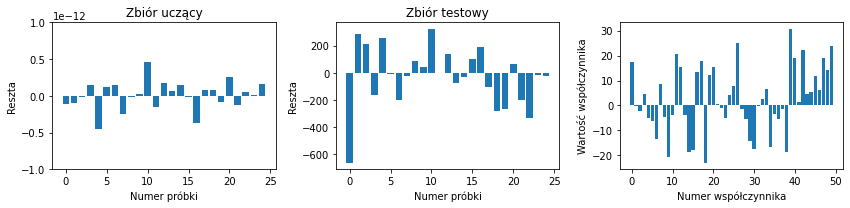

In [ ]:
rysuj_reszty_i_współczynniki(y_train-model.predict(X_train),y_test-model.predict(X_train),model.coef_)

## Sposoby poprawienia modelu regresji
Model domyślnie dopasowuje się metodą najmniejszych kwadratów, czyli minimalizuje funkcję sse. Możemy zmienić tę 'taktykę' dodając 'karę' za jakość dobranych współczynników:
* metoda LASSO, ```linear_model.Lasso``` (preferuje jak najmniej niezerowych współczynników)
* regresja grzebietowa, ```linear_model.Ridge``` (preferuje jak najmniejsze współczynniki)

## Zadanie
* dokonaj podziału danych na uczące i testowe
* przeprowadź analizę regresji metodą Lasso lub regresją grzbietową z ustalonym współczynnikiem $\alpha$ 
* sprawdź błąd kwadratowy na danych uczących i na danych testowych
* oceń dopasowanie modelu metodą score
* sporządź rysunki za pomocą zdefiniowanej wyżej funkcji ```rysuj_reszty_i_współczynniki```

In [ ]:
model2=linear_model.Ridge()
model2.fit(X_train,y_train)
y_predict=model2.predict(X_test)

In [ ]:
np.sqrt(metrics.mean_squared_error(y_predict,y_test))

130.9698284389528

In [ ]:
model2.score(X_train,y_train)

0.9996949589334693

In [ ]:
model2.score(X_test,y_test)

0.39698587713340217

(<Figure size 864x216 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d1f980410>,
       dtype=object))

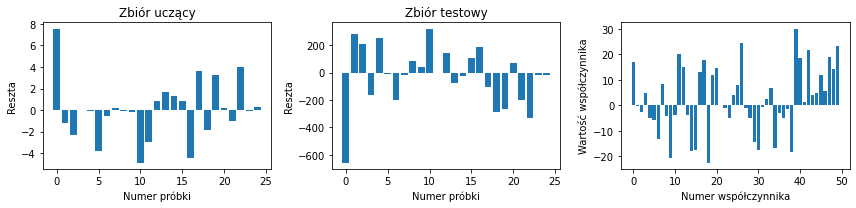

In [ ]:
rysuj_reszty_i_współczynniki(y_train-model2.predict(X_train),y_test-model2.predict(X_train),model2.coef_)

# Klasyfikacja
Dokonamy klasyfikacji (przypisania do grup) danych na podstawie zbioru danych cech irysów. Korzystamy z modelu ```linear_model.LogisticRegression```. Można też wykorzystać w tym celu:
* drzewa decyzyjne ```tree.DecisionTreeClassifier```
* metodę najbliższego sąsiada ```neighbors.KNeighborsClassifier```

In [ ]:
irysy=datasets.load_iris()

In [ ]:
type(irysy)

sklearn.utils.Bunch

In [ ]:

X_all=irysy.data
y_all=irysy.target

In [ ]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_all,y_all)

In [ ]:
model=linear_model.LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
y_predict-y_test

array([ 0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0])

In [ ]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.94      0.94        16
           2       0.89      0.89      0.89         9

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



## Zadanie 
Spośród cech irysów wybierz tylko dwie i dokonaj klasyfikacji gatunków za ich pomocą metodą najbliższych trzech sąsiadów (dla wcześniej zdefiniowanego podziału). Narysuj wykres punktowy opisujący te dwie wybrane cechy i z kolorami punktów zależnymi od klasyfikacji (na danych testowych). Obok narysuj ten sam wykres z oryginalną klasyfikacją.

neighbors.KNeighborsClassifier

In [ ]:
irysy.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
from sklearn import neighbors
model=neighbors.KNeighborsClassifier(3)
x=0
y=2
model.fit(X_train[:,[x,y]],y_train)

KNeighborsClassifier(n_neighbors=3)

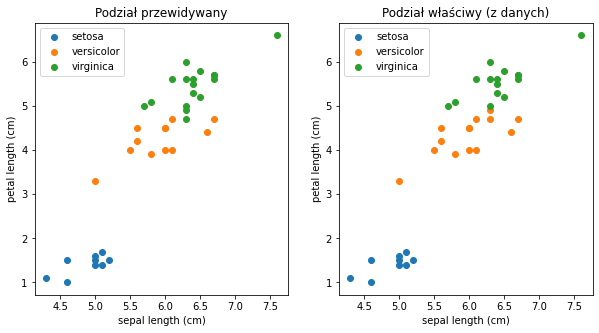

In [ ]:
y_predict=model.predict(X_test[:,[x,y]])

fig,ax=plt.subplots(1,2,figsize=(10,5))
for i in range(3):
    maska=(y_predict == i)
    ax[0].scatter(X_test[:,x][maska],X_test[:,y][maska],label=irysy.target_names[i])
    ax[0].set(title='Podział przewidywany', xlabel=irysy.feature_names[x],ylabel=irysy.feature_names[y])
ax[0].legend()

for i in range(3):
    maska=(y_test == i)
    ax[1].scatter(X_test[:,x][maska],X_test[:,y][maska],label=irysy.target_names[i])
    ax[1].set(title='Podział właściwy (z danych)', xlabel=irysy.feature_names[x],ylabel=irysy.feature_names[y])
ax[1].legend()

## Zadanie domowe
* wygeneruj dane do regresji liniowej z 100 próbkami, 40 cechami, w tym 20 istotnymi i wybranym random_state
* przeprowadź analizę metodą Lasso dla różnych parametrów $\alpha$ i spróbuj określić jaki współczynnik jest najlepszy dla przewidywania przyszłych wyników

In [23]:
X_all, y_all=datasets.make_regression(n_samples=100, n_features=40, n_informative=20, random_state=123456)

In [24]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X_all,y_all)

In [25]:
X_train.shape

(75, 40)

In [26]:
y_train.shape

(75,)

In [36]:
alfa=[0,0.00025,0.001, 0.005, 0.01, 0.1, 0.5, 0.75, 1,5,10,25,50,100,1000,50000]

In [37]:
for el in alfa:
  model=linear_model.Lasso(el)
  model.fit(X_train, y_train)
  y_predict=model.predict(X_test)
  print("alfa: ", el, " wynik ", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

alfa:  0  wynik  0.12213945052590214
alfa:  0.00025  wynik  0.11366788737169653
alfa:  0.001  wynik  0.08966132654361039
alfa:  0.005  wynik  0.04690310328367868
alfa:  0.01  wynik  0.09282991684596342
alfa:  0.1  wynik  0.8120114590035453
alfa:  0.5  wynik  3.9943816982194145
alfa:  0.75  wynik  5.9741839550842
alfa:  1  wynik  7.921029574968046
alfa:  5  wynik  38.08924138413311
alfa:  10  wynik  72.17434218685251
alfa:  25  wynik  154.75398506604057
alfa:  50  wynik  206.16816282824686
alfa:  100  wynik  243.3672227538104
alfa:  1000  wynik  255.4829401716522
alfa:  50000  wynik  255.4829401716522


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Najlepsze uczenie programu jest dla alfa z przedziału (0.001, 0.01)